# **Theoretical Questions :**

1. What is unsupervised learning in context of machine learning?
- Unsupervised learning is a machine learning approach where the model identifies hidden patterns or structures in data without using labeled outputs. Examples include clustering and dimensionality reduction.

2. How does K-Means clustering algorithm work?
- Choose K initial centroids.
- Assign each data point to the nearest centroid.
- Recompute each centroid as the mean of assigned points.
- Repeat assignment and updating until convergence.

3. Explain the concept of a dendrogram in hierarchical clustering.
- A dendrogram is a tree-like visualization that shows how clusters are merged or split at different distances during hierarchical clustering.

4. What is the main difference between K-Means and Hierarchical Clustering?
- K-Means is a partition-based method requiring a predefined number of clusters (K), while hierarchical clustering builds a tree-like hierarchy and does not require specifying K initially.

5. What are the advantages of DBSCAN over K-Means?
- No need to specify the number of clusters.
- Can find arbitrarily shaped clusters.
- Handles noise and outliers better.
- Works well with clusters of varying densities.

6. When would you use Silhouette Score in clustering?
- Silhouette Score is used to evaluate clustering quality by measuring how well data points fit within their cluster compared to others.

7. What are the limitations of Hierarchical Clustering?
- High computational cost (O(n²)).
- Not suitable for very large datasets.
- Once merged or split, decisions cannot be undone.

8. Why is feature scaling important in clustering algorithms like K-Means?
- Because distance-based algorithms rely on Euclidean distance, features with larger scales can dominate. Scaling ensures all features contribute equally.

9. How does DBSCAN identify noise points?
- Points that are not core points and not reachable from any core point are labeled as noise.

10. Define inertia in the context of K-Means.
- Inertia is the sum of squared distances of each point to its assigned cluster centroid. It measures cluster compactness.

11. What is the elbow method in K-Means clustering?
- The elbow method involves plotting inertia vs. number of clusters (K) and selecting the K at the “elbow,” where improvements sharply decrease.

12. Describe the concept of "density" in DBSCAN.
- Density refers to the number of points within a specified radius (ε). Dense regions form clusters.

13. Can hierarchical clustering be used on categorical data?
- Yes, but it requires appropriate distance metrics such as Hamming or Gower distance. Default Euclidean-based linkage does not work with pure categorical data.

14. What does a negative Silhouette Score indicate?
- A negative Silhouette Score indicates incorrect clustering, usually meaning points are assigned to the wrong cluster or clusters overlap.

15. Explain the term "linkage criteria" in hierarchical clustering.
- Linkage criteria determine how distances between clusters are calculated, such as single linkage, complete linkage, average linkage, and Ward’s method.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
- K-Means assumes clusters are spherical and of similar size and density. It struggles when clusters vary significantly or are non-spherical.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
- DBSCAN has two key parameters:
- eps (ε): maximum distance for neighborhood points.
- min_samples: minimum number of points needed to form a dense region.
These control cluster formation and noise detection.

18. How does K-Means++ improve upon standard K-Means initialization?
- K-Means++ selects initial centroids in a smarter, spread-out manner, reducing chances of poor clustering and speeding up convergence.

19. What is agglomerative clustering?
- Agglomerative clustering is a bottom-up hierarchical clustering method that starts with each point as its own cluster and merges them iteratively.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
- Inertia only measures cluster compactness and decreases with increasing K. Silhouette Score evaluates both compactness and separation, providing a balanced clustering quality metric.


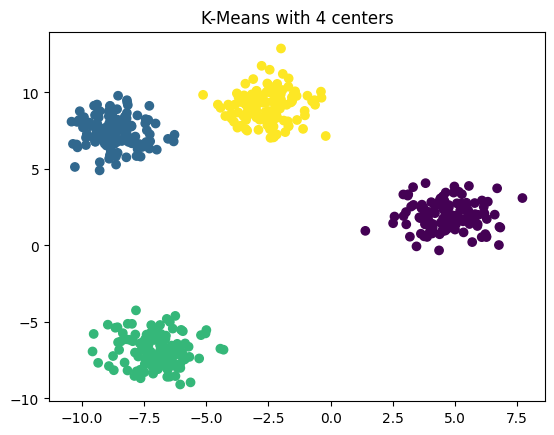

In [1]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using scatter plot

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("K-Means with 4 centers")
plt.show()


In [2]:
# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display first 10 labels.

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

labels[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

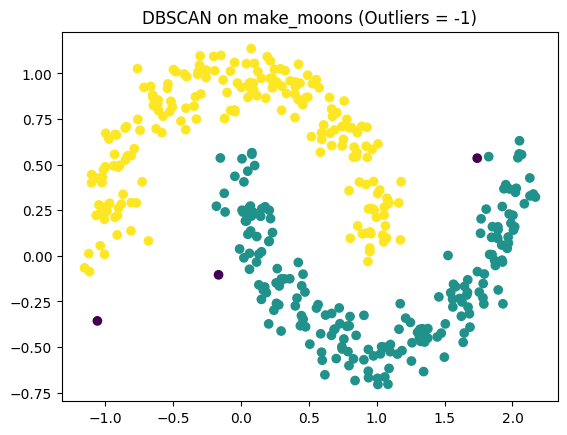

In [3]:
# 23. Generate make_moons and apply DBSCAN. Highlight outliers.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=400, noise=0.1, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN on make_moons (Outliers = -1)")
plt.show()


In [4]:
# 24. Wine dataset + K-Means after standardizing. Print cluster sizes.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = load_wine()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

np.unique(labels, return_counts=True)


(array([0, 1, 2], dtype=int32), array([65, 51, 62]))

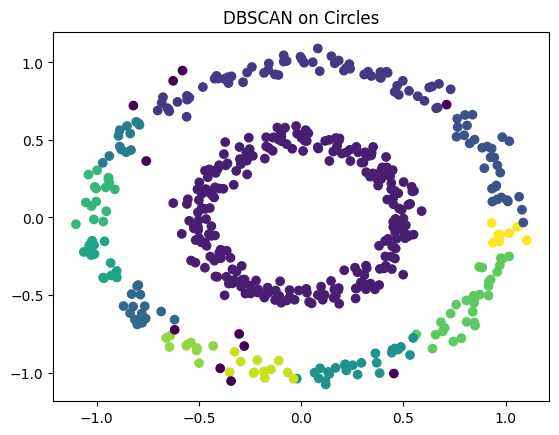

In [5]:
# 25. make_circles + DBSCAN. Plot result.

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)

db = DBSCAN(eps=0.1, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on Circles")
plt.show()


In [6]:
# 26. Breast Cancer + MinMaxScaler + KMeans with 2 clusters. Show centroids.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data
X_scaled = MinMaxScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

kmeans.cluster_centers_


array([[0.50483563, 0.39560329, 0.50578661, 0.36376576, 0.46988732,
        0.42226302, 0.41838662, 0.46928035, 0.45899738, 0.29945886,
        0.19093085, 0.19112073, 0.17903433, 0.13086432, 0.18017962,
        0.25890126, 0.12542475, 0.30942779, 0.190072  , 0.13266975,
        0.48047448, 0.45107371, 0.4655302 , 0.31460597, 0.49868817,
        0.36391461, 0.39027292, 0.65827197, 0.33752296, 0.26041387],
       [0.25535358, 0.28833455, 0.24696416, 0.14388369, 0.35743076,
        0.18019471, 0.10344776, 0.1306603 , 0.34011829, 0.25591606,
        0.06427485, 0.18843043, 0.05975663, 0.02870108, 0.18158628,
        0.13242941, 0.05821528, 0.18069336, 0.17221057, 0.08403996,
        0.2052406 , 0.32069002, 0.19242138, 0.09943446, 0.3571115 ,
        0.14873935, 0.13142287, 0.26231363, 0.22639412, 0.15437354]])

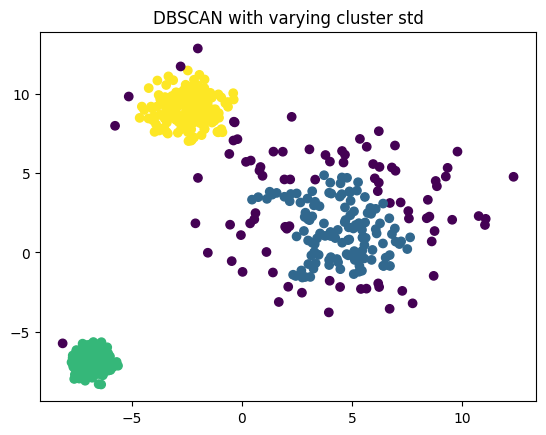

In [7]:
# 27. make_blobs with varying std + DBSCAN

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=600,
                  centers=3,
                  cluster_std=[1.0, 2.5, 0.5],
                  random_state=42)

db = DBSCAN(eps=0.7, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN with varying cluster std")
plt.show()


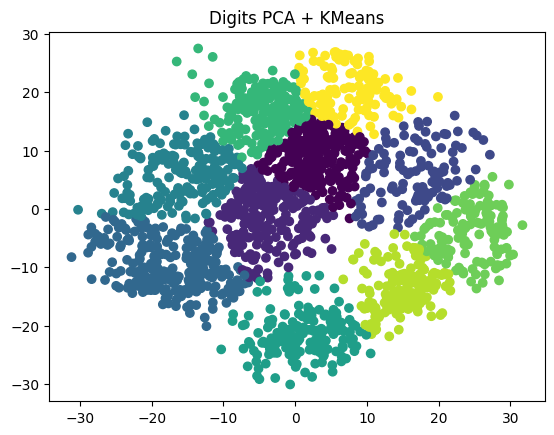

In [8]:
# 28. Digits dataset → PCA(2D) → KMeans → visualize

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

X_pca = PCA(2).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("Digits PCA + KMeans")
plt.show()


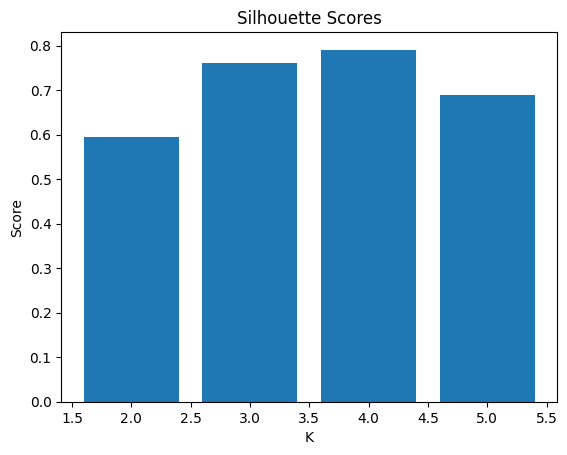

In [9]:
# 29. make_blobs and silhouette score for K = 2 to 5 (bar chart)

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

scores = []
ks = [2, 3, 4, 5]

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(ks, scores)
plt.title("Silhouette Scores")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()


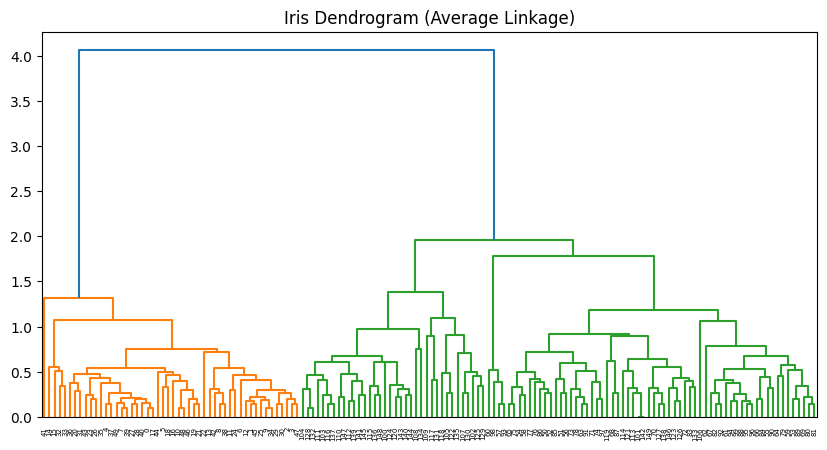

In [10]:
# 30. Iris hierarchical clustering dendrogram (average linkage)

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

Z = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Iris Dendrogram (Average Linkage)")
plt.show()


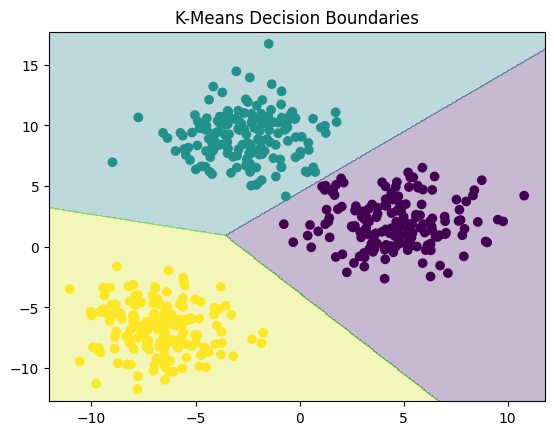

In [11]:
# 31. Overlapping blobs + K-Means + decision boundaries

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Decision boundary grid
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means Decision Boundaries")
plt.show()


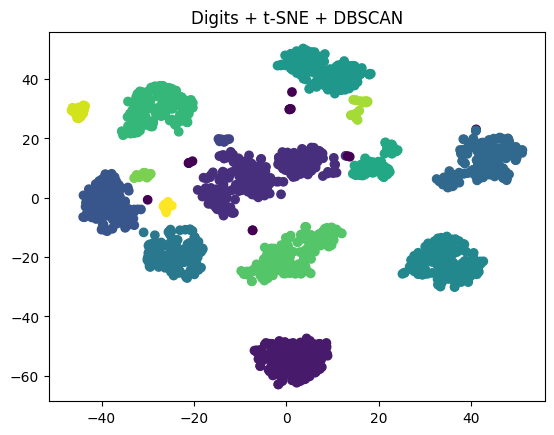

In [12]:
# 32. Digits dataset + t-SNE + DBSCAN

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

db = DBSCAN(eps=3, min_samples=5)
labels = db.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title("Digits + t-SNE + DBSCAN")
plt.show()


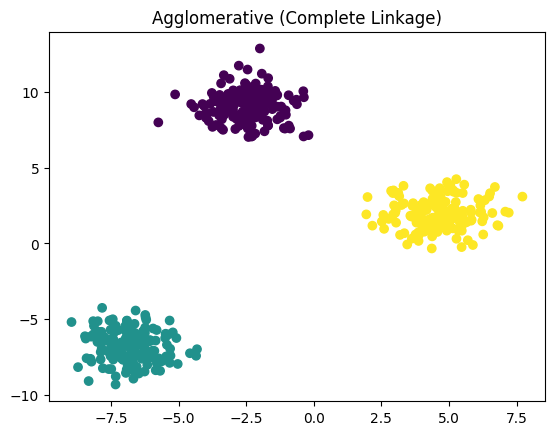

In [13]:
# 33. make_blobs + Agglomerative (complete linkage)

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=3, random_state=42)

agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative (Complete Linkage)")
plt.show()


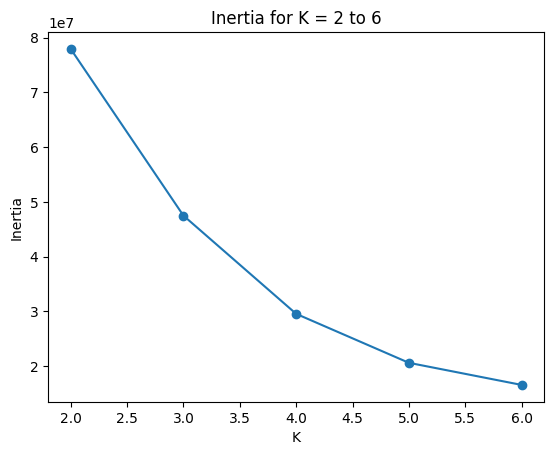

In [14]:
# 34. Breast Cancer inertia for K=2 to 6

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

Ks = [2, 3, 4, 5, 6]
inertias = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(Ks, inertias, marker='o')
plt.title("Inertia for K = 2 to 6")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()


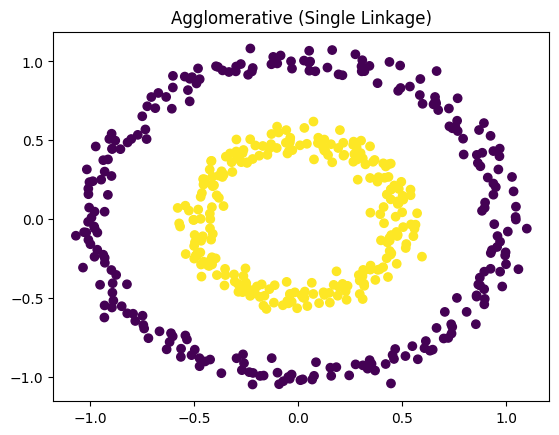

In [15]:
# 35. concentric circles + Agglomerative (single linkage)

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative (Single Linkage)")
plt.show()


In [16]:
# 36. Wine dataset + DBSCAN after scaling → count clusters (excluding noise)

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

data = load_wine()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters


0

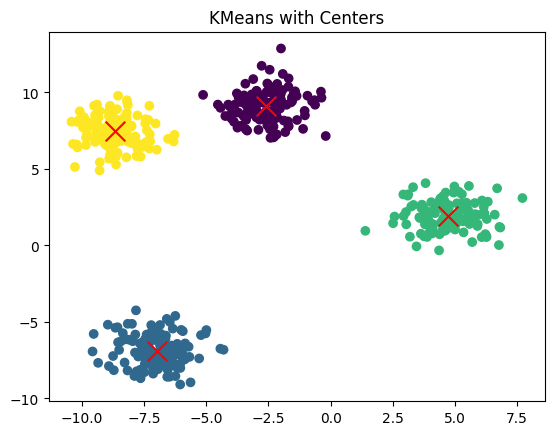

In [17]:
# 37. make_blobs + KMeans + plot centers

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker='x', color='red')
plt.title("KMeans with Centers")
plt.show()


In [18]:
# 38. Iris + DBSCAN → count noise samples

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = iris.data

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

np.sum(labels == -1)


np.int64(17)

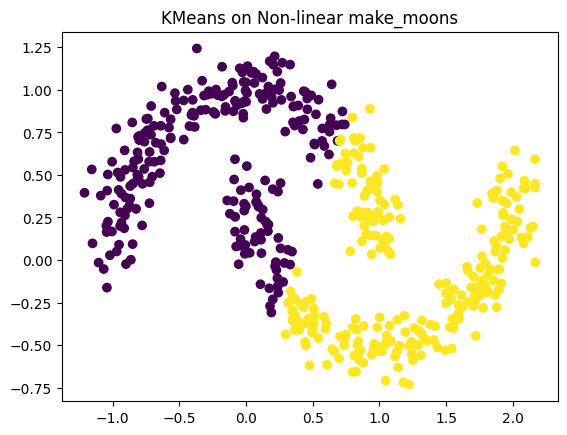

In [19]:
# 39. make_moons + KMeans visualization

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("KMeans on Non-linear make_moons")
plt.show()


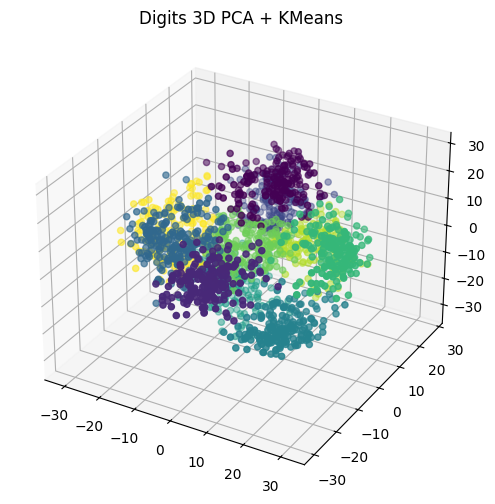

In [20]:
# 40. Digits → PCA(3D) → KMeans → 3D scatter plot

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

X_pca = PCA(3).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)
plt.title("Digits 3D PCA + KMeans")
plt.show()


Silhouette Score (k=5): 0.7253558707644244


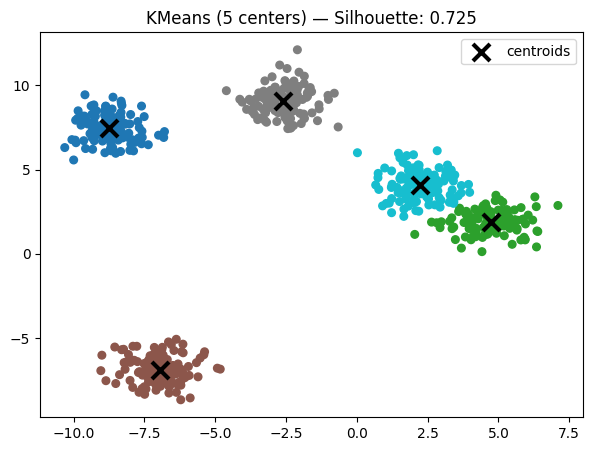

In [21]:
# 41) Generate synthetic blobs with 5 centers and apply KMeans. Then compute silhouette_score.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Data
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Silhouette
score = silhouette_score(X, labels)
print("Silhouette Score (k=5):", score)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='x', s=150, linewidths=3, color='k', label='centroids')
plt.title(f"KMeans (5 centers) — Silhouette: {score:.3f}")
plt.legend()
plt.show()


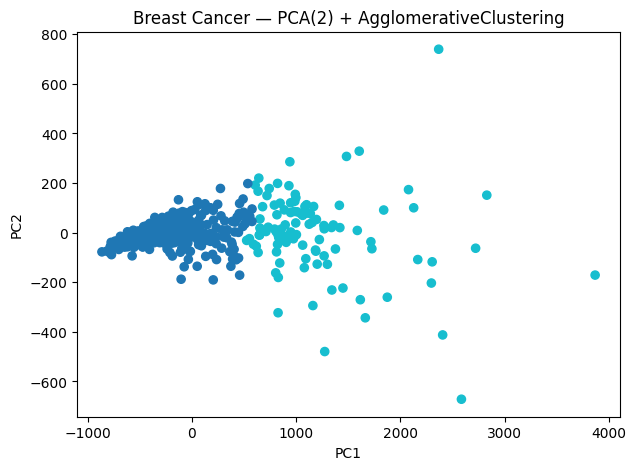

In [22]:
# 42) Load Breast Cancer dataset, reduce with PCA, apply Agglomerative Clustering, visualize in 2D.

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Load & PCA
data = load_breast_cancer()
X = data.data
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')  # ward is common for numeric
labels = agg.fit_predict(X2)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='tab10', s=35)
plt.title("Breast Cancer — PCA(2) + AgglomerativeClustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


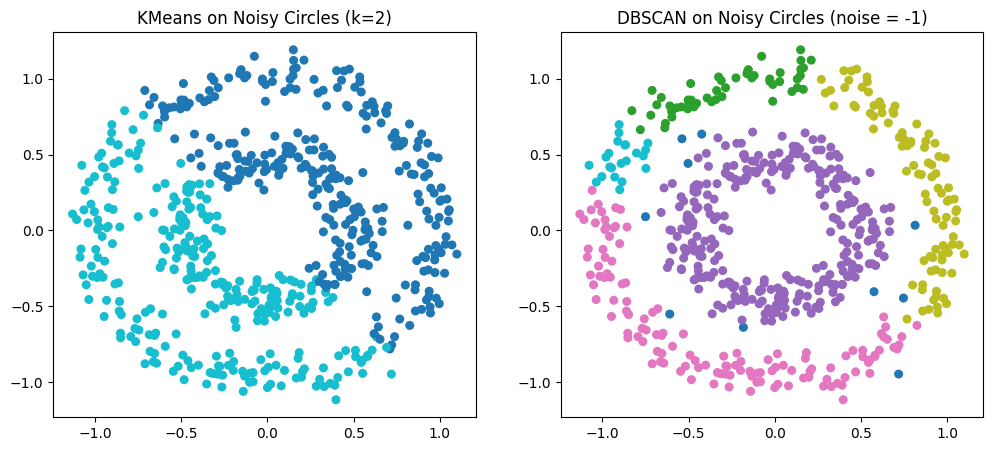

In [23]:
# 43) Generate noisy circles and show KMeans vs DBSCAN side-by-side.

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Data
X, _ = make_circles(n_samples=600, noise=0.08, factor=0.5, random_state=42)

# KMeans (2 clusters)
km = KMeans(n_clusters=2, random_state=42)
labels_km = km.fit_predict(X)

# DBSCAN
db = DBSCAN(eps=0.12, min_samples=5)
labels_db = db.fit_predict(X)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].scatter(X[:,0], X[:,1], c=labels_km, s=30, cmap='tab10')
axes[0].set_title("KMeans on Noisy Circles (k=2)")

axes[1].scatter(X[:,0], X[:,1], c=labels_db, s=30, cmap='tab10')
axes[1].set_title("DBSCAN on Noisy Circles (noise = -1)")
plt.show()


Average Silhouette Score: 0.551191604619592


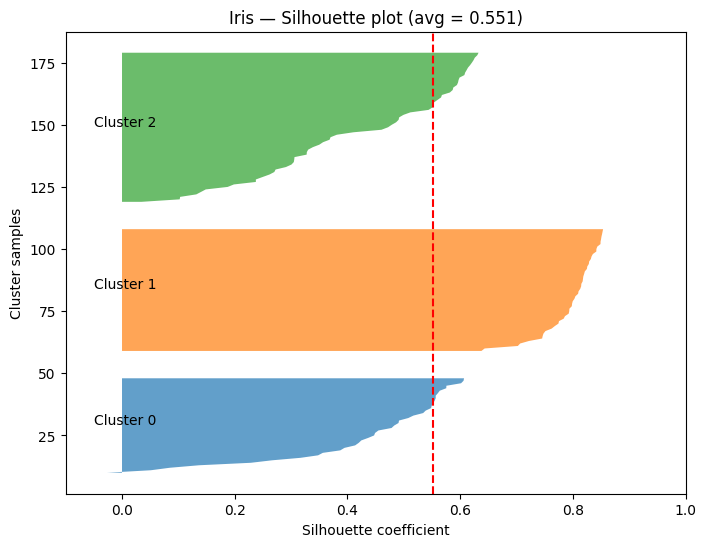

In [24]:
# 44) Load Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load & KMeans
iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Silhouette per sample
sil_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)
print("Average Silhouette Score:", avg_score)

# Plot silhouette values (classic silhouette plot style simplified)
y_lower = 10
plt.figure(figsize=(8,6))
for i in range(3):
    ith_sil_vals = np.sort(sil_vals[labels==i])
    size_cluster = ith_sil_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_sil_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, f"Cluster {i}")
    y_lower = y_upper + 10  # 10 for spacing

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster samples")
plt.title(f"Iris — Silhouette plot (avg = {avg_score:.3f})")
plt.axvline(x=avg_score, color="red", linestyle="--")
plt.xlim([-0.1, 1])
plt.show()


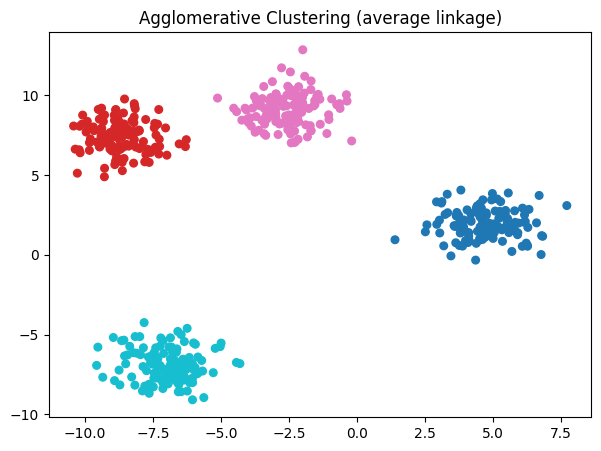

In [25]:
# 45) Generate synthetic data with make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='tab10')
plt.title("Agglomerative Clustering (average linkage)")
plt.show()


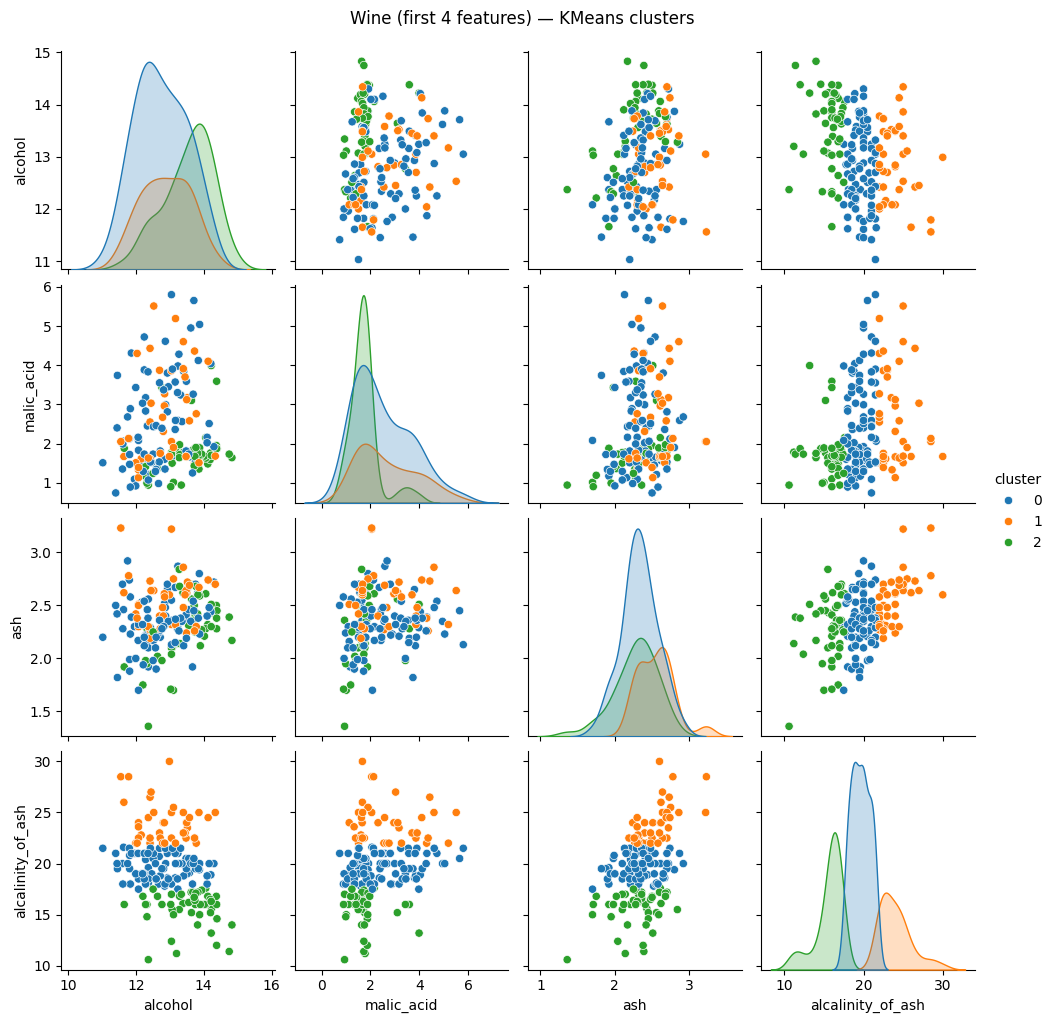

In [26]:
# 46) Load Wine dataset, apply KMeans, and visualize cluster assignments in a seaborn pairplot (first 4 features).

import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])  # first 4 features
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.values)

# Pairplot (first 4 features) colored by cluster
sns.pairplot(df, hue='cluster', palette='tab10', diag_kind='kde', corner=False)
plt.suptitle("Wine (first 4 features) — KMeans clusters", y=1.02)
plt.show()


In [27]:
# 47) Generate noisy blobs and use DBSCAN to identify clusters and noise points. Print counts.

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=700, centers=4, cluster_std=1.6, random_state=42)
# Add some uniformly distributed noise points
rng = np.random.RandomState(42)
noise = rng.uniform(low=X.min(axis=0)-6, high=X.max(axis=0)+6, size=(80, X.shape[1]))
X_noisy = np.vstack([X, noise])

db = DBSCAN(eps=0.8, min_samples=6)
labels = db.fit_predict(X_noisy)

n_noise = np.sum(labels == -1)
unique_labels = set(labels)
n_clusters = len([lab for lab in unique_labels if lab != -1])

print("Number of clusters found (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters found (excluding noise): 4
Number of noise points: 137


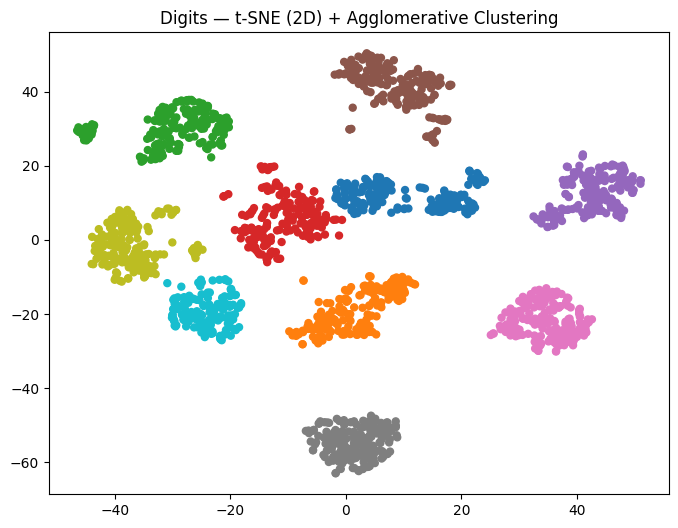

In [28]:
# 48) Load Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot clusters.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

# t-SNE to 2D (use a modest perplexity for speed)
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca').fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(X_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10', s=25)
plt.title("Digits — t-SNE (2D) + Agglomerative Clustering")
plt.show()
